##### Run on Windows 10 using Anaconda 3

# Porting MATLAB Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Defining the ANN Architecture

In [2]:
n_in = 3  # input layer
n_h1 = 7  # hidden layer 1
n_h2 = 5  # hidden layer 2
n_out = 3 # output layer

### Defining Parameters

In [3]:
x_in = np.zeros((n_in,1)) # initializing the input
w_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,n_in))      # weight of hidden layer 1
b_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,1))         # bias of hidden layer 1
w_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,n_h1))      # weight of hidden layer 2
b_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,1))         # bias of hidden layer 2
w_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,n_h2))    # weight of output layer 
b_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,1))       # bias of output layer 
d_out = np.zeros((n_out,1)) # initializing the output

eta = 0.1  # learning rate

### Training Data

In [4]:
N = 8

# input data
X = np.array([[0, 0, 0], 
               [0, 0, 1], 
               [0,1, 0],
               [0, 1, 1],
               [1, 0, 0],
               [ 1, 0, 1],
               [ 1, 1, 0],
               [1, 1, 1]])

# output data
Y = np.array([[0, 0, 0],
               [1, 1, 0],
               [1, 0, 1],
               [0, 1, 1],
               [0, 1, 1],
               [1, 0, 0],
               [1, 1, 0],
               [0, 0, 0]])

### Training Phase

In [5]:
max_epoch = 30000;    # number of epochs
totalerr = np.zeros((max_epoch, 1))   # initializing error vector

for q in range(max_epoch):
    
    p = np.random.permutation(N)   # randomized the order of data
    
    for n in range(N):
        nn = p[n]
        
        x_in = X[nn,:][:,None]
        d_out = Y[nn,:][:, None]
        
    # Forward pass
        # Hidden layer 1
        v_h1 = np.matmul(w_h1, x_in) + b_h1
        y_h1 = 1/(1 + np.exp(-v_h1))
        
        # Hidden Layer 2
        v_h2 = np.matmul(w_h2, y_h1) + b_h2
        y_h2 = 1/(1 + np.exp(-v_h2))
        
        # Output Layer
        v_out = np.matmul(w_out, y_h2) + b_out
        out = 1/(1 + np.exp(-v_out))
        
    # Backpropagation
        # compute error
        err = d_out - out
        
        # compute gradient in the output layer
        delta_out = np.multiply(np.multiply(err, out), 1-out)
        
        # compute gradient in hidden layer 2
        delta_h2 = np.multiply(np.multiply(y_h2, 1-y_h2), np.matmul(w_out.transpose(), delta_out))
        
        # compute gradeint in hidden layer 1
        delta_h1 = np.multiply(np.multiply(y_h1, 1-y_h1), np.matmul(w_h2.transpose(), delta_h2))
        
        # update the weights and biases of output layer
        w_out = w_out + eta * np.matmul(delta_out, y_h2.transpose())
        b_out = b_out + eta * delta_out
        
        # update the weights and biases of hidden layer 2
        w_h2 = w_h2 + eta * np.matmul(delta_h2, y_h1.transpose()) 
        b_h2 = b_h2 + eta * delta_h2
        
        # update the weights and biases of hidden layer 1
        w_h1 = w_h1 + eta * np.matmul(delta_h1, x_in.T)
        b_h1 = b_h1 + eta * delta_h1
        
    totalerr[q] += np.sum(np.multiply(err, err))
    
    # Print the error every 500th iteration
    if np.mod(q, 500) == 0:
        print('Iteration: ', q ,' Error: ', totalerr[q])
    
    # Stopping criterion
    if totalerr[q] < 0.001:
        break

Iteration:  0  Error:  [0.8165796]
Iteration:  500  Error:  [0.91712163]
Iteration:  1000  Error:  [0.90803878]
Iteration:  1500  Error:  [0.65133783]
Iteration:  2000  Error:  [0.90326571]
Iteration:  2500  Error:  [0.65142133]
Iteration:  3000  Error:  [0.8670409]
Iteration:  3500  Error:  [0.96786719]
Iteration:  4000  Error:  [0.58578424]
Iteration:  4500  Error:  [1.30883678]
Iteration:  5000  Error:  [0.52718481]
Iteration:  5500  Error:  [0.56277244]
Iteration:  6000  Error:  [0.56658292]
Iteration:  6500  Error:  [0.52342745]
Iteration:  7000  Error:  [0.53405724]
Iteration:  7500  Error:  [0.20013362]
Iteration:  8000  Error:  [0.0697048]
Iteration:  8500  Error:  [0.50221949]
Iteration:  9000  Error:  [0.01237998]
Iteration:  9500  Error:  [0.05794691]
Iteration:  10000  Error:  [0.07397142]
Iteration:  10500  Error:  [0.02478755]
Iteration:  11000  Error:  [0.02357331]
Iteration:  11500  Error:  [0.03712474]
Iteration:  12000  Error:  [0.00486349]
Iteration:  12500  Error:  

### Test Phase

In [6]:
nn_output = np.zeros(Y.shape)

for n in range(N):
    x_in = X[n,:][:, None]
    d_out = Y[n,:][:,None]
    
    # hidden layer 1
    v_h1 = np.matmul(w_h1, x_in) + b_h1
    y_h1 = 1/(1 + np.exp(-v_h1))
    
    # hidden layer 2
    v_h2 = np.matmul(w_h2, y_h1) + b_h2
    y_h2 = 1/(1 + np.exp(-v_h2))
    
    # output layer
    v_out = np.matmul(w_out, y_h2) + b_out
    out = 1/(1 + np.exp(-v_out))
    nn_output[n,:] = 1*np.greater(out.transpose(), 0.5)
    
    # print the input-ouput pairs
    x_in = x_in.transpose().tolist()
    x_in = [x for x_in_sub in x_in for x in x_in_sub]
    print(x_in, nn_output[n,:].tolist())
    
print('Total bits with error: ', np.sum(np.sum(np.absolute(Y - nn_output))))
print('Total epochs: ', q)
print('Network error at termination: ', totalerr[q])

[0, 0, 0] [0.0, 0.0, 0.0]
[0, 0, 1] [1.0, 1.0, 0.0]
[0, 1, 0] [1.0, 0.0, 1.0]
[0, 1, 1] [0.0, 1.0, 1.0]
[1, 0, 0] [0.0, 1.0, 1.0]
[1, 0, 1] [1.0, 0.0, 0.0]
[1, 1, 0] [1.0, 1.0, 0.0]
[1, 1, 1] [0.0, 0.0, 0.0]
Total bits with error:  0.0
Total epochs:  19207
Network error at termination:  [0.00099932]


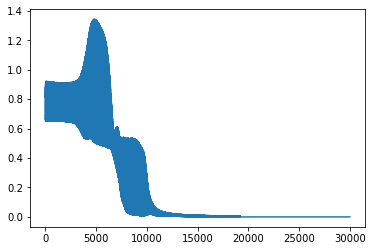

In [7]:
# Error Graph
plt.plot(totalerr)
plt.show()

# PA2A: Implementation of the Backpropagation Algorithm, Performance	Comparison with	SVM

## Data Prepocessing

#### Data Import and Visualization

<BarContainer object of 8 artists>

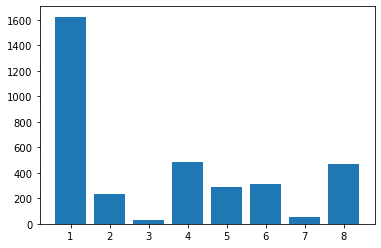

In [5]:
import csv

data_labels = open('data_labels.csv')  # import data
data_points = open('data.csv')
labels = list(csv.reader(data_labels))  # conbvert to list
labels = [label for sublist in labels for label in sublist]   #convert a list of list to list

counts = np.bincount(labels)
counts = counts.tolist()
counts.pop(0)
plt.bar(range(1,len(counts) + 1), counts)

The data is highly imbalanced. Training on this dataset will cause the neural network to 'favor' Class 1. One of the solutions is to oversample the minority classes.
Before oversampling, split the data to train and test sets. This ensures that the network will test on data it has not seen before.

#### Train, Validation, and Test Split

Before splitting, convert the data class to numpy array, then concatenate them.

In [6]:
data = np.array(list(csv.reader(data_points)), dtype=float) # convert features to numpy array
labels = np.array(labels, dtype=float) # convert labels to numpy array   
labels = labels[:,None] # the output of the last line is a horizontal vector. what is needed is vertical. 
# unlike MATLAB, Numpy transpose does not invert the dimensions of 1D array. [:, None] accomplishes the transpose of 1D array
cmplt_data = np.asarray(np.concatenate((labels, data), axis=1))  # concatenate the two matrices

Now sort the data according to labels

In [7]:
cmplt_data = cmplt_data[cmplt_data[:,0].argsort()]

Now, split the data into 60% train, 20% validation, and 20% test sets by stratified sampling

In [8]:
# Initialize the data split containers
width = len(data.T)
train_data = np.empty((0,width), float)
train_label = np.empty((0,1), float)
validate_data = np.empty((0,width), float)
validate_label = np.empty((0,1), float)
test_data = np.empty((0,width), float)
test_label = np.empty((0,1), float)

In [9]:
# Extract the data
first_index = 0
for count in counts:
    category = cmplt_data[first_index:(first_index + count), :]  # get the set corresponding to each label
    first_index += count
    

    n_train = int(np.round(0.6 * len(category)))  # count of 60% training
    n_validate = int(np.round(0.2 * len(category))) # count of 20% validation
    n_test = int(len(category) - n_train - n_validate) # count of 20% test

    np.random.shuffle(category)  # randomized the order of the data
    train_d, validate_d, test_d = np.split(category[:,1:],[n_train, n_train+n_validate]) # split the data into three
    train_l, validate_l, test_l = np.split(category[:,0],[n_train, n_train+n_validate])  # split the labels into three
    
    # assign the extracted data to their respective variables
    train_data = np.concatenate((train_data, train_d))
    train_label = np.concatenate((train_label, train_l[:, None]))
    validate_data = np.concatenate((validate_data, validate_d))
    validate_label = np.concatenate((validate_label, validate_l[:, None]))
    test_data = np.concatenate((test_data, test_d))
    test_label = np.concatenate((test_label, test_l[:, None]))

#### Oversampling

Now that the data has been split, oversample each set using SMOTE.

In [20]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
train_data_res, train_label_res = oversample.fit_resample(train_data, train_label)
validate_data_res, validate_label_res = oversample.fit_resample(validate_data, validate_label)
test_data_res, test_label_res = oversample.fit_resample(test_data, test_label)

<BarContainer object of 8 artists>

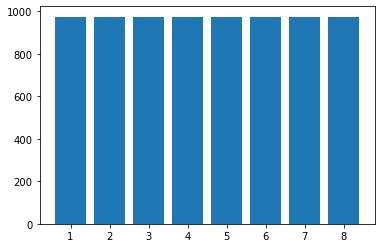

In [28]:
# training set distribution
num, freq = np.unique(train_label_res, return_counts=True)
plt.bar(num, freq)

<BarContainer object of 8 artists>

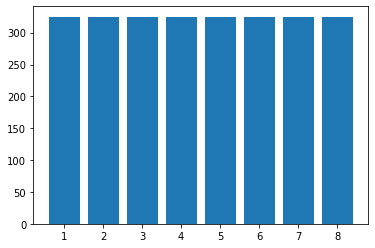

In [30]:
# validation set distribution
num, freq = np.unique(validate_label_res, return_counts=True)
plt.bar(num, freq)

<BarContainer object of 8 artists>

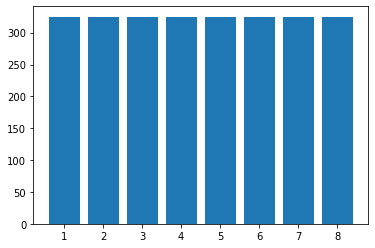

In [32]:
# test set validation
num, freq = np.unique(test_label_res, return_counts=True)
plt.bar(num, freq)

Write the data to CSV files

In [60]:
file_name = ['training_set.csv','training_labels.csv', 'validation_set.csv', 'validation_labels.csv', 
             'test_set.csv', 'test_labels.csv']
arrays = [train_data_res, train_label_res, validate_data_res, validate_label_res, test_data_res, test_label_res]
for index in range(6):
    np.savetxt(file_name[index], arrays[index], delimiter=',')

## Neural Network

### Trial 1

#### Defining Architecture

In [155]:
N_train = len(train_data_res)
N_validate = len(validate_data_res)
n_in = len(train_data_res.T)  # input layer
n_h1 = 64 #int(np.round(n_in * .75))  # hidden layer 1
n_h2 = 64 #int(np.round(n_in * .5))  # hidden layer 2
n_out = 1 # output layer

#### Deining Network Parameters

In [156]:
x_in = np.zeros((n_in,1)) # initializing the input
w_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,n_in))      # weight of hidden layer 1
b_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,1))         # bias of hidden layer 1
w_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,n_h1))      # weight of hidden layer 2
b_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,1))         # bias of hidden layer 2
w_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,n_h2))    # weight of output layer 
b_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,1))       # bias of output layer 
d_out = np.zeros((n_out,1)) # initializing the output

eta = 0.01  # learning rate

#### Training and Validation Phase

In [157]:
max_epoch = 30000;    # number of epochs
totalerr_train = np.zeros((max_epoch, 1))   # initializing error vector
totalerr_validate = np.zeros((max_epoch, 1)) 

for q in range(max_epoch):
    
    # TRAINING PHASE
    p = np.random.permutation(N_train)   # randomized the order of data
    
    for n in range(N_train):
        nn = p[n]
        
        x_in = train_data_res[nn,:][:, None]
        d_out = 1/train_label_res[nn]    #the output of the sigmoid is between 0 and 1
        
    # Forward pass
        # Hidden layer 1
        v_h1 = np.matmul(w_h1, x_in) + b_h1
        y_h1 = 1/(1 + np.exp(-v_h1))
        
        # Hidden Layer 2
        v_h2 = np.matmul(w_h2, y_h1) + b_h2
        y_h2 = 1/(1 + np.exp(-v_h2))
        
        # Output Layer
        v_out = np.matmul(w_out, y_h2) + b_out
        out = 1/(1 + np.exp(-v_out))        
    # Backpropagation
        # compute error
        err = d_out - out
        
        # compute gradient in the output layer
        delta_out = np.multiply(np.multiply(err, out), 1-out)
        
        # compute gradient in hidden layer 2
        delta_h2 = np.multiply(np.multiply(y_h2, 1-y_h2), np.matmul(w_out.transpose(), delta_out))
        
        # compute gradeint in hidden layer 1
        delta_h1 = np.multiply(np.multiply(y_h1, 1-y_h1), np.matmul(w_h2.transpose(), delta_h2))
        
        # update the weights and biases of output layer
        w_out = w_out + eta * np.matmul(delta_out, y_h2.transpose())
        b_out = b_out + eta * delta_out
        
        # update the weights and biases of hidden layer 2
        w_h2 = w_h2 + eta * np.matmul(delta_h2, y_h1.transpose()) 
        b_h2 = b_h2 + eta * delta_h2
        
        # update the weights and biases of hidden layer 1
        w_h1 = w_h1 + eta * np.matmul(delta_h1, x_in.T)
        b_h1 = b_h1 + eta * delta_h1
        
    totalerr_train[q] += err[0]*err[0]
    
    # Print the error every 500th iteration
    if np.mod(q, 500) == 0:
        print('Iteration: ', q ,' Training Error: ', totalerr_train[q])
        
        
    
    # VALIDATION PHASE
    p = np.random.permutation(N_validate)
    for n in range(N_validate):
        nn = p[n]
        
        x_in = validate_data_res[nn,:][:, None]
        d_out = 1/validate_label_res[nn]
        
    # Forward pass
        # Hidden layer 1
        v_h1 = np.matmul(w_h1, x_in) + b_h1
        y_h1 = 1/(1 + np.exp(-v_h1))
        
        # Hidden Layer 2
        v_h2 = np.matmul(w_h2, y_h1) + b_h2
        y_h2 = 1/(1 + np.exp(-v_h2))
        
        # Output Layer
        v_out = np.matmul(w_out, y_h2) + b_out
        out = 1/(1 + np.exp(-v_out))
        
        # compute error
        err = d_out - out
        
    totalerr_validate[q] += err[0]*err[0]
    
    if np.mod(q, 500) == 0:
        print('Iteration: ', q ,' Validation Error: ', totalerr_validate[q])
        print(np.round(1/out)[0][0], 1/d_out)
    
    
    # Stopping criterion
    #if totalerr_train[q] < 0.00001:
        #break

Iteration:  0  Training Error:  [8.67418497e-05]
Iteration:  0  Validation Error:  [0.03990442]
3.0 7.0
Iteration:  500  Training Error:  [0.0061057]
Iteration:  500  Validation Error:  [0.06795512]
2.0 5.0
Iteration:  1000  Training Error:  [0.0424125]
Iteration:  1000  Validation Error:  [0.0029261]
11.0 7.0
Iteration:  1500  Training Error:  [0.05144332]
Iteration:  1500  Validation Error:  [0.02378856]
6.0 3.0
Iteration:  2000  Training Error:  [0.00050279]
Iteration:  2000  Validation Error:  [0.0016901]
5.0 6.0
Iteration:  2500  Training Error:  [8.77761262e-06]
Iteration:  2500  Validation Error:  [0.00721934]
6.0 4.0
Iteration:  3000  Training Error:  [5.74092661e-06]
Iteration:  3000  Validation Error:  [0.00169304]
3.0 4.0
Iteration:  3500  Training Error:  [0.01483979]
Iteration:  3500  Validation Error:  [0.00040797]
4.0 4.0
Iteration:  4000  Training Error:  [0.00044045]
Iteration:  4000  Validation Error:  [0.00711666]
9.0 5.0
Iteration:  4500  Training Error:  [0.0054579

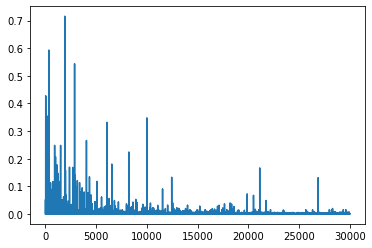

In [158]:
# Plot the errors
plt.plot(totalerr_train)
plt.show()

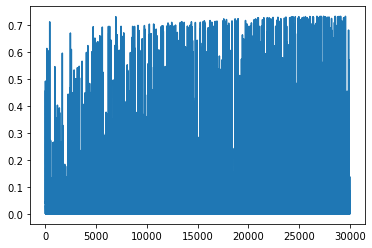

In [159]:
plt.plot(totalerr_validate)
plt.show()

#### Test Phase

In [160]:
totalerr_test = np.zeros((len(test_data_res), 1))
correct = 0
for n in range(len(test_data_res)):
    
    nn = p[n]

    x_in = test_data_res[nn,:][:, None]
    d_out = 1/test_label_res[nn]

    # Hidden layer 1
    v_h1 = np.matmul(w_h1, x_in) + b_h1
    y_h1 = 1/(1 + np.exp(-v_h1))

    # Hidden Layer 2
    v_h2 = np.matmul(w_h2, y_h1) + b_h2
    y_h2 = 1/(1 + np.exp(-v_h2))

    # Output Layer
    v_out = np.matmul(w_out, y_h2) + b_out
    out = 1/(1 + np.exp(-v_out))

    err = d_out - out
    #print(np.round(1/out)[0][0], 1/d_out)
    
    if int(np.round(1/out)[0][0]) == int(1/d_out):
        correct += 1
                         
    totalerr_test[n] += np.sum(np.multiply(err, err))
    
print(correct/len(test_data_res)*100)

48.11538461538461


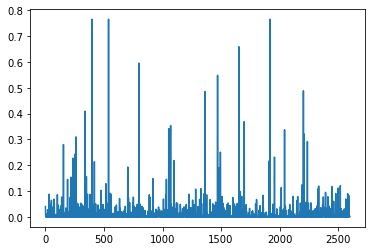

In [161]:
#plot the error
plt.plot(totalerr_test)
plt.show()

### Trial 2

#### Defining Architecture

In [9]:
N_train = len(train_data_res)
N_validate = len(validate_data_res)
n_in = len(train_data_res.T)  # input layer
n_h1 = 64 #int(np.round(n_in * .75))  # hidden layer 1
n_h2 = 64 #int(np.round(n_in * .5))  # hidden layer 2
n_out = 1 # output layer

#### Deining Network Parameters

In [10]:
x_in = np.zeros((n_in,1)) # initializing the input
w_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,n_in))      # weight of hidden layer 1
b_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,1))         # bias of hidden layer 1
w_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,n_h1))      # weight of hidden layer 2
b_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,1))         # bias of hidden layer 2
w_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,n_h2))    # weight of output layer 
b_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,1))       # bias of output layer 
d_out = np.zeros((n_out,1)) # initializing the output

eta = 0.01  # learning rate

#### Training and Validation Phase

In [11]:
max_epoch = 30000;    # number of epochs
totalerr_train = np.zeros((max_epoch, 1))   # initializing error vector
totalerr_validate = np.zeros((max_epoch, 1)) 

for q in range(max_epoch):
    
    # TRAINING PHASE
    p = np.random.permutation(N_train)   # randomized the order of data
    
    for n in range(N_train):
        nn = p[n]
        
        x_in = train_data_res[nn,:][:, None]
        d_out = 1/train_label_res[nn]    #the output of the sigmoid is between 0 and 1
        
    # Forward pass
        # Hidden layer 1
        v_h1 = np.matmul(w_h1, x_in) + b_h1
        y_h1 = 1/(1 + np.exp(-v_h1))
        
        # Hidden Layer 2
        v_h2 = np.matmul(w_h2, y_h1) + b_h2
        y_h2 = 1/(1 + np.exp(-v_h2))
        
        # Output Layer
        v_out = np.matmul(w_out, y_h2) + b_out
        out = 1/(1 + np.exp(-v_out))        
    # Backpropagation
        # compute error
        err = d_out - out
        
        # compute gradient in the output layer
        delta_out = np.multiply(np.multiply(err, out), 1-out)
        
        # compute gradient in hidden layer 2
        delta_h2 = np.multiply(np.multiply(y_h2, 1-y_h2), np.matmul(w_out.transpose(), delta_out))
        
        # compute gradeint in hidden layer 1
        delta_h1 = np.multiply(np.multiply(y_h1, 1-y_h1), np.matmul(w_h2.transpose(), delta_h2))
        
        # update the weights and biases of output layer
        w_out = w_out + eta * np.matmul(delta_out, y_h2.transpose())
        b_out = b_out + eta * delta_out
        
        # update the weights and biases of hidden layer 2
        w_h2 = w_h2 + eta * np.matmul(delta_h2, y_h1.transpose()) 
        b_h2 = b_h2 + eta * delta_h2
        
        # update the weights and biases of hidden layer 1
        w_h1 = w_h1 + eta * np.matmul(delta_h1, x_in.T)
        b_h1 = b_h1 + eta * delta_h1
        
    totalerr_train[q] += err[0]*err[0]
    
    # Print the error every 500th iteration
    if np.mod(q, 500) == 0:
        print('Iteration: ', q ,' Training Error: ', totalerr_train[q])
        
        
    
    # VALIDATION PHASE
    p = np.random.permutation(N_validate)
    for n in range(N_validate):
        nn = p[n]
        
        x_in = validate_data_res[nn,:][:, None]
        d_out = 1/validate_label_res[nn]
        
    # Forward pass
        # Hidden layer 1
        v_h1 = np.matmul(w_h1, x_in) + b_h1
        y_h1 = 1/(1 + np.exp(-v_h1))
        
        # Hidden Layer 2
        v_h2 = np.matmul(w_h2, y_h1) + b_h2
        y_h2 = 1/(1 + np.exp(-v_h2))
        
        # Output Layer
        v_out = np.matmul(w_out, y_h2) + b_out
        out = 1/(1 + np.exp(-v_out))
        
        # compute error
        err = d_out - out
        
    totalerr_validate[q] += err[0]*err[0]
    
    if np.mod(q, 500) == 0:
        print('Iteration: ', q ,' Validation Error: ', totalerr_validate[q])
        print(np.round(1/out)[0][0], 1/d_out)
    
    
    # Stopping criterion
    if totalerr_train[q] < 0.00001:
        break

Iteration:  0  Training Error:  [0.00018499]
Iteration:  0  Validation Error:  [0.02347183]
3.0 6.0


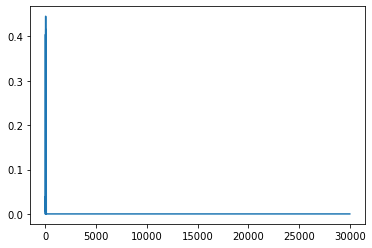

In [12]:
# Plot the errors
plt.plot(totalerr_train)
plt.show()

### Trial 3

#### Defining Architecture

In [8]:
N_train = len(train_data_res)
N_validate = len(validate_data_res)
n_in = len(train_data_res.T)  # input layer
n_h1 = 128 #int(np.round(n_in * .75))  # hidden layer 1
n_h2 = 64 #int(np.round(n_in * .5))  # hidden layer 2
n_out = 1 # output layer

#### Deining Network Parameters

In [9]:
x_in = np.zeros((n_in,1)) # initializing the input
w_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,n_in))      # weight of hidden layer 1
b_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,1))         # bias of hidden layer 1
w_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,n_h1))      # weight of hidden layer 2
b_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,1))         # bias of hidden layer 2
w_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,n_h2))    # weight of output layer 
b_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,1))       # bias of output layer 
d_out = np.zeros((n_out,1)) # initializing the output

eta = 0.01  # learning rate

#### Training and Validation Phase

In [10]:
max_epoch = 30000;    # number of epochs
totalerr_train = np.zeros((max_epoch, 1))   # initializing error vector
totalerr_validate = np.zeros((max_epoch, 1)) 

for q in range(max_epoch):
    
    # TRAINING PHASE
    p = np.random.permutation(N_train)   # randomized the order of data
    
    for n in range(N_train):
        nn = p[n]
        
        x_in = train_data_res[nn,:][:, None]
        d_out = 1/train_label_res[nn]    #the output of the sigmoid is between 0 and 1
        
    # Forward pass
        # Hidden layer 1
        v_h1 = np.matmul(w_h1, x_in) + b_h1
        y_h1 = 1/(1 + np.exp(-v_h1))
        
        # Hidden Layer 2
        v_h2 = np.matmul(w_h2, y_h1) + b_h2
        y_h2 = 1/(1 + np.exp(-v_h2))
        
        # Output Layer
        v_out = np.matmul(w_out, y_h2) + b_out
        out = 1/(1 + np.exp(-v_out))        
    # Backpropagation
        # compute error
        err = d_out - out
        
        # compute gradient in the output layer
        delta_out = np.multiply(np.multiply(err, out), 1-out)
        
        # compute gradient in hidden layer 2
        delta_h2 = np.multiply(np.multiply(y_h2, 1-y_h2), np.matmul(w_out.transpose(), delta_out))
        
        # compute gradeint in hidden layer 1
        delta_h1 = np.multiply(np.multiply(y_h1, 1-y_h1), np.matmul(w_h2.transpose(), delta_h2))
        
        # update the weights and biases of output layer
        w_out = w_out + eta * np.matmul(delta_out, y_h2.transpose())
        b_out = b_out + eta * delta_out
        
        # update the weights and biases of hidden layer 2
        w_h2 = w_h2 + eta * np.matmul(delta_h2, y_h1.transpose()) 
        b_h2 = b_h2 + eta * delta_h2
        
        # update the weights and biases of hidden layer 1
        w_h1 = w_h1 + eta * np.matmul(delta_h1, x_in.T)
        b_h1 = b_h1 + eta * delta_h1
        
    totalerr_train[q] += err[0]*err[0]
    
    # Print the error every 500th iteration
    if np.mod(q, 500) == 0:
        print('Iteration: ', q ,' Training Error: ', totalerr_train[q])
        
        
    
    # VALIDATION PHASE
    p = np.random.permutation(N_validate)
    for n in range(N_validate):
        nn = p[n]
        
        x_in = validate_data_res[nn,:][:, None]
        d_out = 1/validate_label_res[nn]
        
    # Forward pass
        # Hidden layer 1
        v_h1 = np.matmul(w_h1, x_in) + b_h1
        y_h1 = 1/(1 + np.exp(-v_h1))
        
        # Hidden Layer 2
        v_h2 = np.matmul(w_h2, y_h1) + b_h2
        y_h2 = 1/(1 + np.exp(-v_h2))
        
        # Output Layer
        v_out = np.matmul(w_out, y_h2) + b_out
        out = 1/(1 + np.exp(-v_out))
        
        # compute error
        err = d_out - out
        
    totalerr_validate[q] += err[0]*err[0]
    
    if np.mod(q, 500) == 0:
        print('Iteration: ', q ,' Validation Error: ', totalerr_validate[q])
        print(np.round(1/out)[0][0], 1/d_out)
    
    
    # Stopping criterion
    # if totalerr_train[q] < 0.00001:
        #break

Iteration:  0  Training Error:  [0.02521572]
Iteration:  0  Validation Error:  [0.01785273]
3.0 6.0
Iteration:  500  Training Error:  [0.00033201]
Iteration:  500  Validation Error:  [0.01023661]
3.0 2.0
Iteration:  1000  Training Error:  [0.00368984]
Iteration:  1000  Validation Error:  [1.56345596e-07]
1.0 1.0
Iteration:  1500  Training Error:  [0.00393098]
Iteration:  1500  Validation Error:  [0.01298008]
12.0 5.0
Iteration:  2000  Training Error:  [1.21784648e-05]
Iteration:  2000  Validation Error:  [0.00102031]
4.0 5.0
Iteration:  2500  Training Error:  [0.04149389]
Iteration:  2500  Validation Error:  [0.12910224]
2.0 1.0
Iteration:  3000  Training Error:  [0.00088741]
Iteration:  3000  Validation Error:  [0.00074636]
7.0 6.0
Iteration:  3500  Training Error:  [0.00052806]
Iteration:  3500  Validation Error:  [0.03650099]
2.0 3.0
Iteration:  4000  Training Error:  [5.55412613e-05]
Iteration:  4000  Validation Error:  [1.37656074e-05]
7.0 7.0
Iteration:  4500  Training Error:  [0

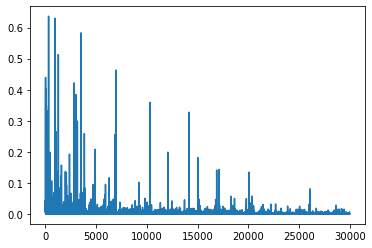

In [11]:
# Plot the errors
plt.plot(totalerr_train)
plt.show()

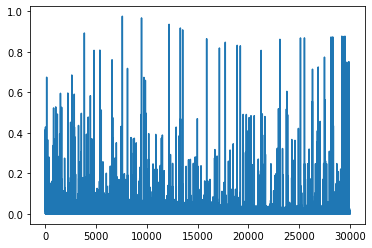

In [12]:
plt.plot(totalerr_validate)
plt.show()

#### Test Phase

In [18]:
totalerr_test = np.zeros((len(test_data_res), 1))
correct = 0
for n in range(len(test_data_res)):

    x_in = test_data_res[n,:][:, None]
    d_out = 1/test_label_res[n]

    # Hidden layer 1
    v_h1 = np.matmul(w_h1, x_in) + b_h1
    y_h1 = 1/(1 + np.exp(-v_h1))

    # Hidden Layer 2
    v_h2 = np.matmul(w_h2, y_h1) + b_h2
    y_h2 = 1/(1 + np.exp(-v_h2))

    # Output Layer
    v_out = np.matmul(w_out, y_h2) + b_out
    out = 1/(1 + np.exp(-v_out))

    err = d_out - out
    #print(np.round(1/out)[0][0], 1/d_out)
    
    if int(np.round(1/out)[0][0]) == int(1/d_out):
        correct += 1
                         
    totalerr_test[n] += np.sum(np.multiply(err, err))
    
print(correct/len(test_data_res)*100)

51.80769230769231


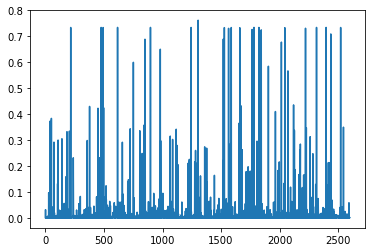

In [14]:
#plot the error
plt.plot(totalerr_test)
plt.show()

### Trial 4

#### Defining Architecture

In [29]:
N_train = len(train_data_res)
N_validate = len(validate_data_res)
n_in = len(train_data_res.T)  # input layer
n_h1 = 256 #int(np.round(n_in * .75))  # hidden layer 1
n_h2 = 128 #int(np.round(n_in * .5))  # hidden layer 2
n_out = 1 # output layer

#### Deining Network Parameters

In [30]:
x_in = np.zeros((n_in,1)) # initializing the input
w_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,n_in))      # weight of hidden layer 1
b_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,1))         # bias of hidden layer 1
w_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,n_h1))      # weight of hidden layer 2
b_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,1))         # bias of hidden layer 2
w_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,n_h2))    # weight of output layer 
b_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,1))       # bias of output layer 
d_out = np.zeros((n_out,1)) # initializing the output

eta = 0.01  # learning rate

#### Training and Validation Phase

In [31]:
max_epoch = 15000;    # number of epochs
totalerr_train = np.zeros((max_epoch, 1))   # initializing error vector
totalerr_validate = np.zeros((max_epoch, 1)) 

for q in range(max_epoch):
    
    # TRAINING PHASE
    p = np.random.permutation(N_train)   # randomized the order of data
    
    for n in range(N_train):
        nn = p[n]
        
        x_in = train_data_res[nn,:][:, None]
        d_out = 1/train_label_res[nn]    #the output of the sigmoid is between 0 and 1
        
    # Forward pass
        # Hidden layer 1
        v_h1 = np.matmul(w_h1, x_in) + b_h1
        y_h1 = 1/(1 + np.exp(-v_h1))
        
        # Hidden Layer 2
        v_h2 = np.matmul(w_h2, y_h1) + b_h2
        y_h2 = 1/(1 + np.exp(-v_h2))
        
        # Output Layer
        v_out = np.matmul(w_out, y_h2) + b_out
        out = 1/(1 + np.exp(-v_out))        
    # Backpropagation
        # compute error
        err = d_out - out
        
        # compute gradient in the output layer
        delta_out = np.multiply(np.multiply(err, out), 1-out)
        
        # compute gradient in hidden layer 2
        delta_h2 = np.multiply(np.multiply(y_h2, 1-y_h2), np.matmul(w_out.transpose(), delta_out))
        
        # compute gradeint in hidden layer 1
        delta_h1 = np.multiply(np.multiply(y_h1, 1-y_h1), np.matmul(w_h2.transpose(), delta_h2))
        
        # update the weights and biases of output layer
        w_out = w_out + eta * np.matmul(delta_out, y_h2.transpose())
        b_out = b_out + eta * delta_out
        
        # update the weights and biases of hidden layer 2
        w_h2 = w_h2 + eta * np.matmul(delta_h2, y_h1.transpose()) 
        b_h2 = b_h2 + eta * delta_h2
        
        # update the weights and biases of hidden layer 1
        w_h1 = w_h1 + eta * np.matmul(delta_h1, x_in.T)
        b_h1 = b_h1 + eta * delta_h1
        
    totalerr_train[q] += err[0]*err[0]
    
    # Print the error every 500th iteration
    if np.mod(q, 500) == 0:
        print('Iteration: ', q ,' Training Error: ', totalerr_train[q])
        
        
    
    # VALIDATION PHASE
    p = np.random.permutation(N_validate)
    for n in range(N_validate):
        nn = p[n]
        
        x_in = validate_data_res[nn,:][:, None]
        d_out = 1/validate_label_res[nn]
        
    # Forward pass
        # Hidden layer 1
        v_h1 = np.matmul(w_h1, x_in) + b_h1
        y_h1 = 1/(1 + np.exp(-v_h1))
        
        # Hidden Layer 2
        v_h2 = np.matmul(w_h2, y_h1) + b_h2
        y_h2 = 1/(1 + np.exp(-v_h2))
        
        # Output Layer
        v_out = np.matmul(w_out, y_h2) + b_out
        out = 1/(1 + np.exp(-v_out))
        
        # compute error
        err = d_out - out
        
    totalerr_validate[q] += err[0]*err[0]
    
    if np.mod(q, 500) == 0:
        print('Iteration: ', q ,' Validation Error: ', totalerr_validate[q])
        print(np.round(1/out)[0][0], 1/d_out)
    
    
    # Stopping criterion
    # if totalerr_train[q] < 0.00001:
        #break

Iteration:  0  Training Error:  [0.03287088]
Iteration:  0  Validation Error:  [0.00508891]
3.0 4.0
Iteration:  500  Training Error:  [0.00061404]
Iteration:  500  Validation Error:  [0.00298918]
5.0 4.0
Iteration:  1000  Training Error:  [0.00527193]
Iteration:  1000  Validation Error:  [0.00030023]
7.0 8.0
Iteration:  1500  Training Error:  [7.65583671e-06]
Iteration:  1500  Validation Error:  [0.00015493]
6.0 7.0
Iteration:  2000  Training Error:  [0.0004568]
Iteration:  2000  Validation Error:  [0.01555129]
3388.0 8.0
Iteration:  2500  Training Error:  [0.00018389]
Iteration:  2500  Validation Error:  [1.97000009e-05]
6.0 6.0
Iteration:  3000  Training Error:  [0.00398236]
Iteration:  3000  Validation Error:  [9.75643075e-06]
7.0 7.0
Iteration:  3500  Training Error:  [0.00085742]
Iteration:  3500  Validation Error:  [0.03686117]
1.0 1.0
Iteration:  4000  Training Error:  [0.00109997]
Iteration:  4000  Validation Error:  [0.0012917]
11.0 8.0
Iteration:  4500  Training Error:  [0.01

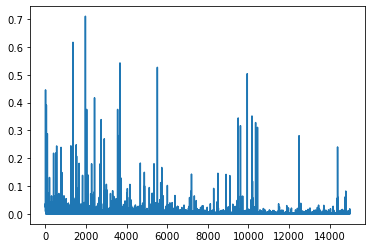

In [32]:
# Plot the errors
plt.plot(totalerr_train)
plt.show()

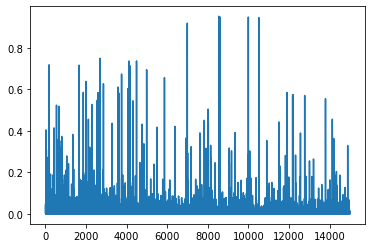

In [33]:
plt.plot(totalerr_validate)
plt.show()

#### Test Phase

In [34]:
totalerr_test = np.zeros((len(test_data_res), 1))
correct = 0
for n in range(len(test_data_res)):
    
    nn = p[n]

    x_in = test_data_res[nn,:][:, None]
    d_out = 1/test_label_res[nn]

    # Hidden layer 1
    v_h1 = np.matmul(w_h1, x_in) + b_h1
    y_h1 = 1/(1 + np.exp(-v_h1))

    # Hidden Layer 2
    v_h2 = np.matmul(w_h2, y_h1) + b_h2
    y_h2 = 1/(1 + np.exp(-v_h2))

    # Output Layer
    v_out = np.matmul(w_out, y_h2) + b_out
    out = 1/(1 + np.exp(-v_out))

    err = d_out - out
    #print(np.round(1/out)[0][0], 1/d_out)
    
    if int(np.round(1/out)[0][0]) == int(1/d_out):
        correct += 1
                         
    totalerr_test[n] += np.sum(np.multiply(err, err))
    
print(correct/len(test_data_res)*100)

40.92307692307692


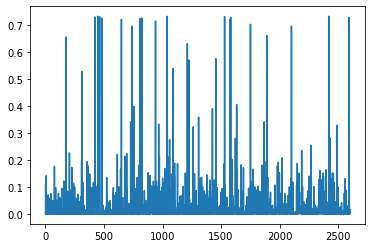

In [35]:
#plot the error
plt.plot(totalerr_test)
plt.show()

The implementation of the neural network as a regression is a bit hard to train.

### Trial 5: Binary Outputs

#### Defining Architecture

In [36]:
N_train = len(train_data_res)
N_validate = len(validate_data_res)
n_in = len(train_data_res.T)  # input layer
n_h1 = 64 #int(np.round(n_in * .75))  # hidden layer 1
n_h2 = 32 #int(np.round(n_in * .5))  # hidden layer 2
n_out = 4 # output layer corresponding to four bits to represent decimal numbers 1 to 8

#### Deining Network Parameters

In [37]:
x_in = np.zeros((n_in,1)) # initializing the input
w_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,n_in))      # weight of hidden layer 1
b_h1 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h1,1))         # bias of hidden layer 1
w_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,n_h1))      # weight of hidden layer 2
b_h2 = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_h2,1))         # bias of hidden layer 2
w_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,n_h2))    # weight of output layer 
b_out = -0.1+(0.1+0.1)*np.random.uniform(0,1, size=(n_out,1))       # bias of output layer 
d_out = np.zeros((n_out,1)) # initializing the output

eta = 0.01  # learning rate

#### Training and Validation Phase

In [39]:
max_epoch = 15000;    # number of epochs
totalerr_train = np.zeros((max_epoch, 1))   # initializing error vector
totalerr_validate = np.zeros((max_epoch, 1)) 

for q in range(max_epoch):
    
    # TRAINING PHASE
    p = np.random.permutation(N_train)   # randomized the order of data
    
    for n in range(N_train):
        nn = p[n]
        
        x_in = train_data_res[nn,:][:, None]
        bits = np.binary_repr(int(train_label_res[nn]), width=4)
        d_out = np.array([float(bit) for bit in bits])
        d_out = d_out[:, None]
        
    # Forward pass
        # Hidden layer 1
        v_h1 = np.matmul(w_h1, x_in) + b_h1
        y_h1 = 1/(1 + np.exp(-v_h1))
        
        # Hidden Layer 2
        v_h2 = np.matmul(w_h2, y_h1) + b_h2
        y_h2 = 1/(1 + np.exp(-v_h2))
        
        # Output Layer
        v_out = np.matmul(w_out, y_h2) + b_out
        out = 1/(1 + np.exp(-v_out))        
    # Backpropagation
        # compute error
        err = d_out - out
        
        # compute gradient in the output layer
        delta_out = np.multiply(np.multiply(err, out), 1-out)
        
        # compute gradient in hidden layer 2
        delta_h2 = np.multiply(np.multiply(y_h2, 1-y_h2), np.matmul(w_out.transpose(), delta_out))
        
        # compute gradeint in hidden layer 1
        delta_h1 = np.multiply(np.multiply(y_h1, 1-y_h1), np.matmul(w_h2.transpose(), delta_h2))
        
        # update the weights and biases of output layer
        w_out = w_out + eta * np.matmul(delta_out, y_h2.transpose())
        b_out = b_out + eta * delta_out
        
        # update the weights and biases of hidden layer 2
        w_h2 = w_h2 + eta * np.matmul(delta_h2, y_h1.transpose()) 
        b_h2 = b_h2 + eta * delta_h2
        
        # update the weights and biases of hidden layer 1
        w_h1 = w_h1 + eta * np.matmul(delta_h1, x_in.T)
        b_h1 = b_h1 + eta * delta_h1
        
    totalerr_train[q] += np.sum(np.multiply(err, err))
    
    # Print the error every 500th iteration
    if np.mod(q, 500) == 0:
        print('Iteration: ', q ,' Training Error: ', totalerr_train[q])
        
        
    
    # VALIDATION PHASE
    p = np.random.permutation(N_validate)
    for n in range(N_validate):
        nn = p[n]
        
        x_in = validate_data_res[nn,:][:, None]
        bits = np.binary_repr(int(validate_label_res[nn]), width=4)
        d_out = np.array([float(bit) for bit in bits])
        d_out = d_out[:, None]
        
    # Forward pass
        # Hidden layer 1
        v_h1 = np.matmul(w_h1, x_in) + b_h1
        y_h1 = 1/(1 + np.exp(-v_h1))
        
        # Hidden Layer 2
        v_h2 = np.matmul(w_h2, y_h1) + b_h2
        y_h2 = 1/(1 + np.exp(-v_h2))
        
        # Output Layer
        v_out = np.matmul(w_out, y_h2) + b_out
        out = 1/(1 + np.exp(-v_out))
        
        # compute error
        err = d_out - out
        
    totalerr_validate[q] += np.sum(np.multiply(err, err))
    
    if np.mod(q, 500) == 0:
        print('Iteration: ', q ,' Validation Error: ', totalerr_validate[q])
        bits_str =''
        for sublist in out.T:
            for item in sublist:
                bits_str += str(int(item))
        int(bits_str,2)
    
    
    # Stopping criterion
    if totalerr_train[q] < 0.0000000001:
        break

Iteration:  0  Training Error:  [0.75079328]
Iteration:  0  Validation Error:  [0.76968967]
Iteration:  500  Training Error:  [0.00365723]
Iteration:  500  Validation Error:  [2.53709367e-07]


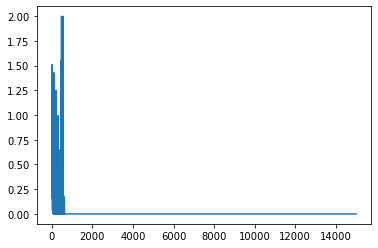

In [40]:
# Plot the errors
plt.plot(totalerr_train)
plt.show()

## Deploy the Model

#### Trial 4

In [15]:
unknown_labels = open('unknown_labels_set.csv') 
unknown_labels = np.array(list(csv.reader(unknown_labels)), dtype=float)

In [28]:
out = np.zeros((len(unknown_labels), 1), dtype=float)

for n in range(len(unknown_labels)):
    
    x_in = unknown_labels[n,:][:, None]

    # Hidden layer 1
    v_h1 = np.matmul(w_h1, x_in) + b_h1
    y_h1 = 1/(1 + np.exp(-v_h1))

    # Hidden Layer 2
    v_h2 = np.matmul(w_h2, y_h1) + b_h2
    y_h2 = 1/(1 + np.exp(-v_h2))

    # Output Layer
    v_out = np.matmul(w_out, y_h2) + b_out
    out[n] = 1/(1 + np.exp(-v_out))
    out[n] = np.round(1/out[n])

np.savetxt('predicted_ann.csv', out, delimiter=',')

## SVM

In [62]:
from sklearn.svm import SVC
import time

#### Linear Kernel

In [73]:
start = time.time()
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_data_res, train_label_res)
end = time.time()
print(end-start)

6.564970254898071


In [49]:
svm_classifier.score(test_data_res, test_label_res)

0.95

#### Polynomial Kernel

In [65]:
start = time.time()
svm_classifier = SVC(kernel='poly')
svm_classifier.fit(train_data_res, train_label_res)
end = time.time()
print(end-start)

7.817798137664795


In [67]:
svm_classifier.score(test_data_res, test_label_res)

0.9438461538461539

#### RBF

In [68]:
start = time.time()
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(train_data_res, train_label_res)
end = time.time()
print(end-start)

10.575345277786255


In [69]:
svm_classifier.score(test_data_res, test_label_res)

0.9184615384615384

#### Sigmoid

In [70]:
start = time.time()
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(train_data_res, train_label_res)
end = time.time()
print(end-start)

10.605339765548706


In [71]:
svm_classifier.score(test_data_res, test_label_res)

0.9184615384615384

### Deploy the model

In [74]:
labels_pred_SVM = svm_classifier.predict(unknown_labels)

In [75]:
print(labels_pred_SVM)

[8. 8. 6. 8. 8. 8. 1. 8. 6. 8. 8. 8. 1. 8. 8. 1. 8. 4. 8. 8. 5. 8. 8. 6.
 1. 8. 8. 8. 8. 8. 4. 8. 6. 8. 4. 8. 8. 6. 1. 8. 4. 6. 6. 8. 4. 8. 6. 6.
 8. 8. 8. 8. 4. 8. 8. 6. 6. 8. 8. 8. 8. 8. 8. 8. 6. 8. 8. 8. 8. 6. 6. 8.
 6. 8. 8. 5. 6. 8. 8. 4. 1. 8. 8. 8. 6. 8. 8. 8. 8. 8. 1. 1. 8. 8. 6. 6.
 4. 8. 8. 8. 8. 4. 4. 8. 6. 4. 8. 8. 8. 6. 1. 8. 1. 6. 1. 6. 4. 8. 1. 5.
 7. 6. 7. 8. 8. 8. 6. 5. 8. 1. 6. 1. 4. 1. 8. 8. 8. 8. 6. 6. 1. 8. 8. 8.
 6. 8. 6. 8. 8. 6. 8. 6. 8. 5. 8. 8. 5. 5. 6. 5. 8. 5. 8. 6. 1. 8. 8. 8.
 6. 5. 6. 8. 6. 4. 4. 6. 6. 2. 8. 1. 8. 8. 8. 6. 8. 1. 8. 6. 5. 8. 8. 8.
 6. 8. 8. 6. 8. 8. 6. 6. 8. 6. 8. 5. 6. 8. 6. 8. 6. 8. 4. 6. 8. 1. 2. 6.
 8. 8. 6. 6. 6. 6. 8. 8. 8. 4. 6. 6. 8. 8. 1. 8. 8. 1. 8. 6. 8. 8. 8. 8.
 4. 8. 8. 8. 1. 8. 8. 6. 5. 8. 1. 8. 8. 8. 8. 6. 8. 8. 6. 6. 8. 8. 4. 7.
 8. 8. 6. 1. 8. 6. 8. 5. 8. 1. 6. 1. 5. 8. 8. 8. 8. 4. 6. 5. 4. 6. 4. 1.
 8. 6. 8. 6. 8. 6. 8. 1. 8. 1. 8. 1. 8. 8. 8. 1. 4. 8. 2. 8. 8. 8. 8. 1.
 4. 2. 4. 6. 6. 5. 8. 5. 6. 5. 2. 8. 8. 6. 5. 4. 1.

In [76]:
np.savetxt('predicted_svm.csv', labels_pred_SVM, delimiter=',')